# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# necessary to see all columns and also show all rows in .explode() function
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# First exploration

In [2]:
anime_df = pd.read_csv('../raw_data/anime.csv')
users_anime_df = pd.read_csv('../raw_data/animelist.csv')
#watching_status_df = pd.read_csv('../raw_data/watching_status.csv')
#rating_complete_df = pd.read_csv('../raw_data/rating_complete.csv')

In [9]:
anime_df_relevant_download = pd.read_csv('../raw_data/anime_df_relevant_PG.csv')

In [3]:
anime_df_relevant_download.head()

,MAL_ID,Name,Genres,Studios
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Bones
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Madhouse
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",Sunrise
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",Toei Animation


In [3]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
users_anime_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [6]:
users_anime_df.shape

(109224747, 5)

In [5]:
# remove all anime_df entries with "hentai" in genre column (+ check Yuri / Yaoi sub-genres removal)
anime_df.shape

(17562, 35)

# Drop duplicates 

In [8]:
#anime_df.duplicated().sum()

0

In [9]:
#users_anime_df.duplicated().sum()

1

# Remove columns  in anime_df 

In [ ]:
# First intent:
# drop columns (and do that earlier): ['Premiered', 'Producers', 'Licensors', 'Ranked', 'Popularity', 'Members']
# keep: ['Source', 'Rating']

# analyze after: ['Studios', "Sources"]

In [ ]:
# second intent: only keep a few columns

In [15]:
anime_df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [16]:
anime_df.Type.value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [17]:
anime_df.Aired.value_counts()

Unknown                         309
2005                             57
2004                             49
2021 to ?                        46
2003                             46
                               ... 
Dec 18, 2009 to Jul 26, 2010      1
Dec 26, 2009                      1
Apr 5, 1993 to Jan 27, 1994       1
Jan 25, 1992                      1
Mar 17, 2021 to ?                 1
Name: Aired, Length: 11947, dtype: int64

In [18]:
anime_df.Source.value_counts()

Original         5215
Manga            3825
Unknown          3567
Visual novel      993
Game              880
Light novel       768
Other             597
Novel             510
Music             317
4-koma manga      288
Web manga         252
Picture book      147
Book              112
Card game          64
Digital manga      15
Radio              12
Name: Source, dtype: int64

In [19]:
anime_df.Rating.value_counts()

PG-13 - Teens 13 or older         6132
G - All Ages                      5782
PG - Children                     1461
Rx - Hentai                       1345
R - 17+ (violence & profanity)    1157
R+ - Mild Nudity                   997
Unknown                            688
Name: Rating, dtype: int64

In [11]:
# keep ['MAL_ID', 'Name', 'Genres', 'Types', 'Aired', 'Studios', 'Duration', 'Rating']

In [20]:
anime_df_relevant = anime_df[['MAL_ID', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source', 'Duration', 'Rating']]

In [21]:
anime_df_relevant

,MAL_ID,Name,Genres,Type,Aired,Studios,Source,Duration,Rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity)
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,"Sep 1, 2001",Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity)
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,"Jul 2, 2002 to Dec 24, 2002",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga,23 min. per ep.,PG - Children
...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural",ONA,"Apr 4, 2021 to ?",Unknown,Novel,Unknown,Unknown
17558,48483,Mieruko-chan,"Comedy, Horror, Supernatural",TV,2021 to ?,Passione,Manga,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,"Mystery, Dementia, Horror, Psychological, Supe...",TV,"Jul, 2021 to ?",Unknown,Visual novel,Unknown,R - 17+ (violence & profanity)
17560,48491,Yama no Susume: Next Summit,"Adventure, Slice of Life, Comedy",TV,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older


In [22]:
anime_df_relevant.columns

Index(['MAL_ID', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source',
       'Duration', 'Rating'],
      dtype='object')

# Remove R18 content in anime_df


In [23]:
# adding _PG to the new df name for "PG_rating"
anime_df_relevant_PG = anime_df_relevant[~anime_df_relevant.Genres.str.contains("Hentai")]

In [24]:
anime_df_relevant_PG = anime_df_relevant_PG[~anime_df_relevant_PG.Genres.str.contains("Yuri")]

In [25]:
anime_df_relevant_PG = anime_df_relevant_PG[~anime_df_relevant_PG.Genres.str.contains("Yaoi")]

In [26]:
anime_df_relevant_PG['Studios'].value_counts()

Unknown                                   6157
Toei Animation                             755
Sunrise                                    479
J.C.Staff                                  350
Madhouse                                   323
                                          ... 
Takahashi Studio, Suna Kouhou                1
Sunrise, Bandai Visual                       1
Production I.G, Welz Animation Studios       1
Studio Pierrot, David Production             1
Studio Kafka                                 1
Name: Studios, Length: 1036, dtype: int64

In [27]:
anime_df_relevant_PG['Studios'].nunique()

1036

In [28]:
anime_df_relevant_PG['Source'].unique()

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Unknown', 'Other', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Card game',
       'Digital manga'], dtype=object)

In [29]:
anime_df_relevant_PG['Source'].value_counts()

Original         5085
Manga            3499
Unknown          3318
Game              869
Light novel       747
Other             590
Novel             505
Visual novel      372
Music             317
4-koma manga      288
Web manga         249
Picture book      147
Book              111
Card game          64
Radio              12
Digital manga      10
Name: Source, dtype: int64

In [30]:
anime_df_relevant_PG['Duration'].value_counts()

24 min. per ep.          1712
23 min. per ep.          1058
25 min. per ep.           826
2 min.                    744
Unknown                   549
                         ... 
27 sec.                     1
1 hr. 24 min. per ep.       1
10 sec. per ep.             1
3 sec.                      1
55 sec. per ep.             1
Name: Duration, Length: 313, dtype: int64

In [31]:
anime_df_relevant_PG['Rating'].value_counts()

PG-13 - Teens 13 or older         6130
G - All Ages                      5782
PG - Children                     1461
R - 17+ (violence & profanity)    1156
R+ - Mild Nudity                   968
Unknown                            686
Name: Rating, dtype: int64

In [32]:
# re-checking if hentai removal worked

In [33]:
anime_df_relevant_PG.Genres.str.contains("Hentai").value_counts()

False    16183
Name: Genres, dtype: int64

In [34]:
anime_df_relevant_PG.Genres.str.contains("Yuri").value_counts()

False    16183
Name: Genres, dtype: int64

In [35]:
anime_df_relevant_PG.Genres.str.contains("Yaoi").value_counts()

False    16183
Name: Genres, dtype: int64

In [36]:
# compare shapes

In [37]:
anime_df.shape

(17562, 35)

In [38]:
anime_df_relevant_PG.shape

(16183, 9)

# Check the missing values (Unknown, ...)

In [39]:
anime_df_relevant_PG[anime_df_relevant_PG.Studios.str.contains("Unknown")]

,MAL_ID,Name,Genres,Type,Aired,Studios,Source,Duration,Rating
192,215,Pia Carrot e Youkoso!! 2 DX,"Comedy, Romance",OVA,"Dec 18, 1999 to Oct 25, 2000",Unknown,Visual novel,28 min. per ep.,PG-13 - Teens 13 or older
288,312,Ace wo Nerae!: Final Stage,"Action, Drama, Sports",OVA,"Oct 25, 1989 to Apr 25, 1990",Unknown,Unknown,24 min. per ep.,PG-13 - Teens 13 or older
337,361,Memories Off,"Romance, Drama",OVA,"Nov 21, 2001 to Mar 6, 2002",Unknown,Visual novel,30 min. per ep.,PG-13 - Teens 13 or older
338,362,Memories Off 2nd,"Romance, Drama",OVA,"Jan 22, 2003 to May 21, 2003",Unknown,Visual novel,30 min. per ep.,PG-13 - Teens 13 or older
391,418,Ranma ½: Chuugoku Nekonron Daikessen! Okite Ya...,"Adventure, Comedy, Shounen",Movie,"Nov 2, 1991",Unknown,Manga,1 hr. 14 min.,PG-13 - Teens 13 or older
...,...,...,...,...,...,...,...,...,...
17550,48441,Eiyuu Densetsu: Sen no Kiseki,Action,TV,2022 to ?,Unknown,Game,Unknown,Unknown
17551,48442,Shikaru Neko,Slice of Life,TV,"Apr, 2021 to ?",Unknown,Manga,Unknown,Unknown
17556,48480,Wan Jie Shen Zhu 3rd Season,"Adventure, Fantasy",ONA,"Mar 17, 2021 to ?",Unknown,Manga,9 min. per ep.,Unknown
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural",ONA,"Apr 4, 2021 to ?",Unknown,Novel,Unknown,Unknown


In [40]:
anime_df_relevant_PG['Studios'].explode().unique()

array(['Sunrise', 'Bones', 'Madhouse', ...,
       'Fanworks, Space Neko Company', 'OZ', 'Studio Kafka'], dtype=object)

In [41]:
anime_df_relevant_PG.columns

Index(['MAL_ID', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source',
       'Duration', 'Rating'],
      dtype='object')

In [42]:
anime_df_relevant_PG['Genres'].value_counts()

Music                                790
Comedy                               668
Kids                                 413
Kids, Music                          234
Dementia                             228
                                    ... 
Action, Adventure, Police, Sci-Fi      1
Action, Sci-Fi, Police                 1
Magic, Vampire, Fantasy                1
Adventure, Fantasy, Kids, Magic        1
Adventure, Mystery, Supernatural       1
Name: Genres, Length: 4840, dtype: int64

In [43]:
anime_df_relevant_PG['Genres'].explode().value_counts()

Music                                790
Comedy                               668
Kids                                 413
Kids, Music                          234
Dementia                             228
                                    ... 
Action, Adventure, Police, Sci-Fi      1
Action, Sci-Fi, Police                 1
Magic, Vampire, Fantasy                1
Adventure, Fantasy, Kids, Magic        1
Adventure, Mystery, Supernatural       1
Name: Genres, Length: 4840, dtype: int64

In [44]:
anime_df_relevant_PG['Type'].explode().value_counts()

TV         4996
Movie      3028
OVA        2575
Special    2193
ONA        1886
Music      1469
Unknown      36
Name: Type, dtype: int64

In [45]:
anime_df_relevant_PG['Duration'].explode().value_counts()

24 min. per ep.          1712
23 min. per ep.          1058
25 min. per ep.           826
2 min.                    744
Unknown                   549
                         ... 
27 sec.                     1
1 hr. 24 min. per ep.       1
10 sec. per ep.             1
3 sec.                      1
55 sec. per ep.             1
Name: Duration, Length: 313, dtype: int64

In [46]:
anime_df_relevant_PG['Studios'].explode().value_counts()

Unknown                                   6157
Toei Animation                             755
Sunrise                                    479
J.C.Staff                                  350
Madhouse                                   323
                                          ... 
Takahashi Studio, Suna Kouhou                1
Sunrise, Bandai Visual                       1
Production I.G, Welz Animation Studios       1
Studio Pierrot, David Production             1
Studio Kafka                                 1
Name: Studios, Length: 1036, dtype: int64

In [47]:
anime_df_relevant_PG['Rating'].explode().value_counts()

PG-13 - Teens 13 or older         6130
G - All Ages                      5782
PG - Children                     1461
R - 17+ (violence & profanity)    1156
R+ - Mild Nudity                   968
Unknown                            686
Name: Rating, dtype: int64

In [48]:
print(anime_df_relevant_PG.apply(lambda col: col.unique()))

MAL_ID      [1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22...
Name        [Cowboy Bebop, Cowboy Bebop: Tengoku no Tobira...
Genres      [Action, Adventure, Comedy, Drama, Sci-Fi, Spa...
Type           [TV, Movie, OVA, Special, ONA, Music, Unknown]
Aired       [Apr 3, 1998 to Apr 24, 1999, Sep 1, 2001, Apr...
Studios     [Sunrise, Bones, Madhouse, Toei Animation, Gal...
Source      [Original, Manga, Light novel, Game, Visual no...
Duration    [24 min. per ep., 1 hr. 55 min., 25 min. per e...
Rating      [R - 17+ (violence & profanity), PG-13 - Teens...
dtype: object


In [49]:
for col in anime_df_relevant_PG:
    print(anime_df_relevant_PG['Studios'].unique())

['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']
['Sunrise' 'Bones' 'Madhouse' ... 'Fanworks, Space Neko Company' 'OZ'
 'Studio Kafka']


# Visualizations

In [69]:
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [67]:
anime_df_relevant_PG.corr()

,anime_id
anime_id,1.0


<AxesSubplot:>

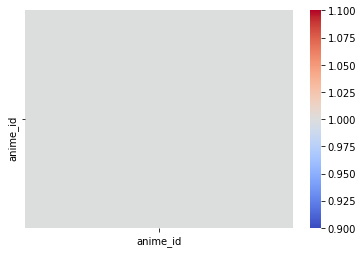

In [64]:
sns.heatmap(anime_df_relevant_PG.corr(), cmap='coolwarm')

<AxesSubplot:>

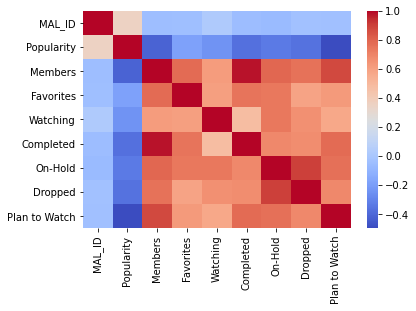

In [65]:
sns.heatmap(anime_df.corr(), cmap='coolwarm')

<AxesSubplot:>

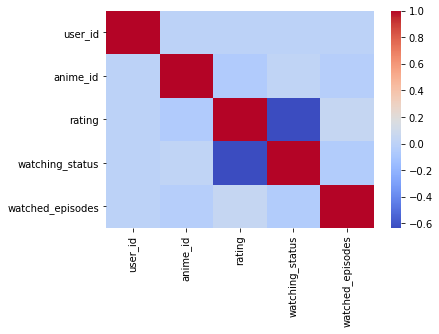

In [66]:
sns.heatmap(users_anime_df.corr(), cmap='coolwarm')

<AxesSubplot:>

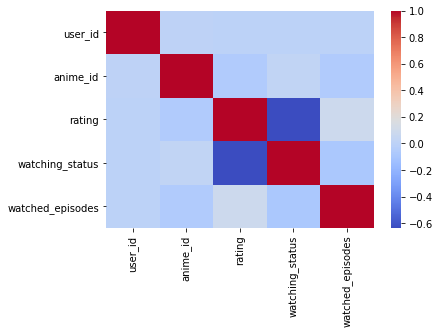

In [70]:
sns.heatmap(users_anime_partial.corr(), cmap='coolwarm') 

In [71]:
#encode string values to be able to build corr matrix
encoded_anime_df = anime_df
for i in encoded_anime_df.columns:
    encoded_anime_df[i] = encoded_anime_df[i].astype('category').cat.codes

<AxesSubplot:>

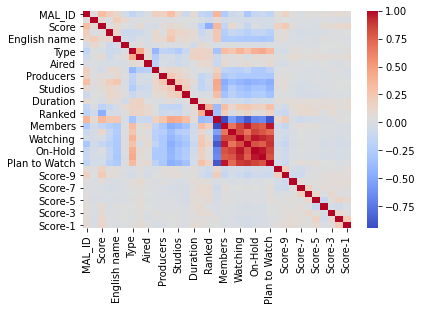

In [72]:
sns.heatmap(encoded_anime_df.corr(), cmap='coolwarm') 

# Remove columns  in users_anime_df

In [50]:
users_anime_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [ ]:
# keep ['user_id', 'anime_id', 'rating']
# TODO : do it on all the df later, only on partial in next part at first

# Merge DFs

In [4]:
anime_df_relevant_download.drop(columns = 'Studios', inplace=True)

In [6]:
anime_df_relevant_download.rename(columns={'MAL_ID': 'anime_id'}, inplace=True)

In [7]:
anime_df_relevant_download.columns

Index(['anime_id', 'Name', 'Genres'], dtype='object')

In [6]:
# (optional, exploration) split cleaned_df before merge
users_anime_partial = users_anime_df.sample(frac=0.0001, random_state=42)

In [11]:
users_anime_partial_relevant = users_anime_partial[['user_id', 'anime_id', 'rating']]

In [13]:
users_anime_partial_relevant

,user_id,anime_id,rating
103975409,336145,2251,10
106163638,343247,2787,9
40226351,130592,235,9
11770069,38258,10572,0
60530240,196188,22729,8
...,...,...,...
89268841,288475,37095,6
80324200,260123,23321,6
101654436,328387,35823,0
74039338,239723,30,7


In [15]:
users_anime_partial_relevant.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [16]:
# remove value = 0 ratings
users_anime_partial_relevant = users_anime_partial_relevant[users_anime_partial_relevant.rating !=0]

In [18]:
users_anime_partial_relevant.rating.value_counts()

8     1550
7     1407
9     1027
6      781
10     734
5      392
4      184
3      100
2       46
1       39
Name: rating, dtype: int64

In [22]:
users_anime_partial_relevant.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [11]:
anime_df_relevant_download.head()

,MAL_ID,Name,Genres,Studios
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Bones
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Madhouse
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",Sunrise
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",Toei Animation


In [33]:
# drop 0 on users_anime_df
users_anime_df.shape

(62397712, 5)

In [14]:
users_anime_relevant = users_anime_df[['user_id', 'anime_id', 'rating']]

In [ ]:
users_anime_df = users_anime_df[users_anime_df.rating !=0]

In [15]:
users_anime_relevant.head()

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
4,0,21,10
5,0,24,9


<AxesSubplot:xlabel='user_id', ylabel='Count'>

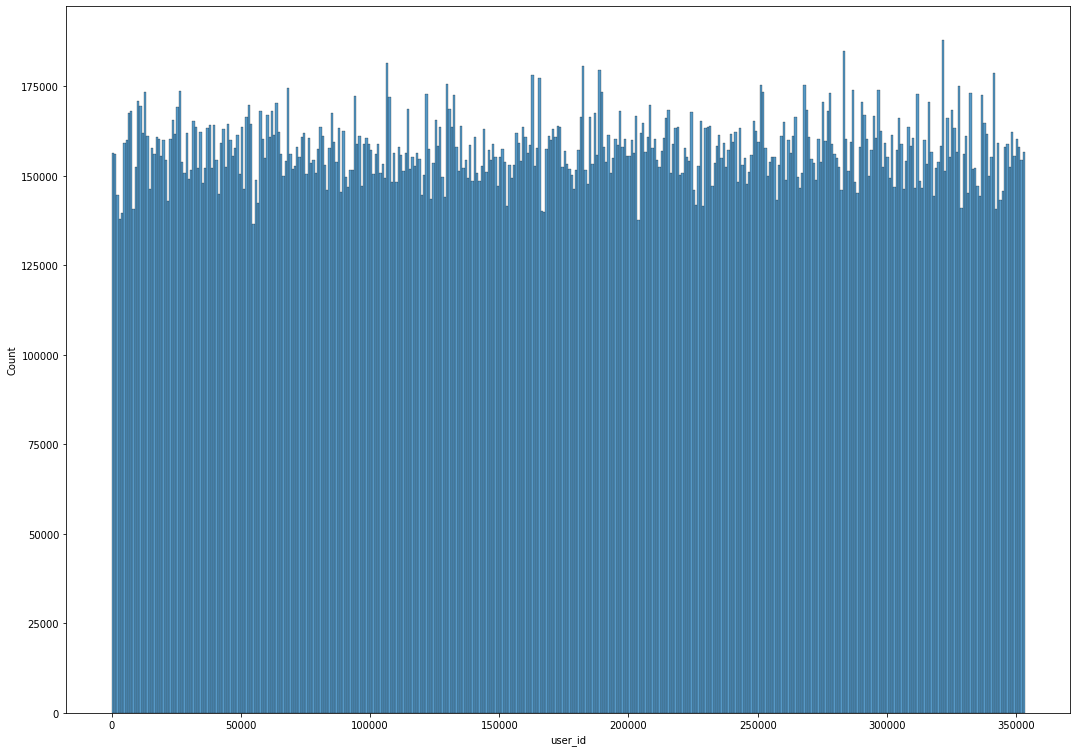

In [21]:
# plot numbers of votes from each user
fig, ax = plt.subplots(figsize=(18, 13))
sns.histplot(users_anime_relevant['user_id'], ax=ax)

In [ ]:
# remove users who only voted a few times

In [55]:
users_anime_df.rating.value_counts()

8     15422150
7     14244633
9     10235934
6      7543377
10     7144392
5      4029645
4      1845854
3       905700
2       545339
1       480688
Name: rating, dtype: int64

In [56]:
#filter users with a minimum of rating
minimun_of_rating = 100
counts = users_anime_relevant['user_id'].value_counts()
active_users_df = users_anime_relevant[users_anime_relevant['user_id'].isin(counts[counts >= minimun_of_rating].index)]
active_users_df.head()

,user_id,anime_id,rating
74,1,37403,8
77,1,7674,7
79,1,34566,7
81,1,40852,9
82,1,10087,7


In [57]:
# export active_users.df (more than 100 votes)
active_users_df.to_csv('../raw_data/active_users_df.csv', index=False)

In [ ]:
active_users_df.head()

In [35]:
# 1
users_anime_df.shape

(62397712, 5)

In [32]:
#10
active_users_df.shape

(62289433, 5)

In [27]:
#20
active_users_df.shape

(62061234, 5)

In [23]:
#50
active_users_df.shape

(60733523, 5)

In [30]:
#100 
active_users_df.shape

(56738161, 5)

In [39]:
#200 
active_users_df.shape

(46106988, 5)

In [37]:
#300 
active_users_df.shape

(36049896, 5)

In [50]:
results= []
i_value=[]
for i in range(0, 500, 25):
    minimun_of_rating = i
    counts = users_anime_df['user_id'].value_counts()
    active_users_df = users_anime_df[users_anime_df['user_id'].isin(counts[counts >= minimun_of_rating].index)]
    results.append(active_users_df.shape[0])
    i_value.append(i)


In [51]:
print(results)
print(i_value)

[62397712, 61902985, 60733523, 58956823, 56738161, 54218893, 51550187, 48819208, 46106988, 43417973, 40827386, 38395714, 36049896, 33851268, 31751046, 29803179, 27996376, 26349873, 24791998, 23295180]
[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475]


<AxesSubplot:>

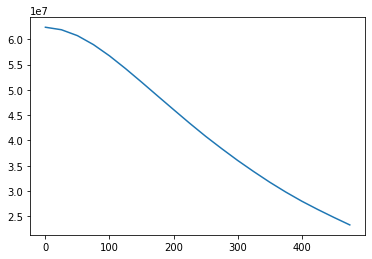

In [52]:
sns.lineplot(x=i_value, y=results)

In [ ]:
# final choice : remove 100

In [23]:
merged_df_download = anime_df_relevant_download.merge(users_anime_partial_relevant, on="anime_id", how='inner')

In [24]:
merged_df_download.head()

,anime_id,Name,Genres,user_id,rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",11550,8
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",247878,10
2,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",194759,9
3,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",298511,6
4,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",289146,10


In [25]:
merged_df_download.isnull().sum()

anime_id    0
Name        0
Genres      0
user_id     0
rating      0
dtype: int64

In [27]:
merged_df_download.to_csv('../raw_data/merged_df_sample.csv', index=False)

In [51]:
# rename MAL_ID in anime.csv to anime_id
anime_df_relevant_PG.rename(columns={'MAL_ID': 'anime_id'}, inplace=True)

In [8]:
users_anime_partial_relevant.head()

NameError: name 'users_anime_partial_relevant' is not defined

In [55]:
users_anime_partial_relevant.shape

(10922, 3)

In [56]:
users_anime_partial_relevant.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [57]:
# fuse anime.csv and animelist.csv
# merged_df = anime_no_H_df.merge(animelist_df, on="anime_id", how='left')
merged_df = anime_df_relevant_PG.merge(users_anime_partial, on="anime_id", how='left')

In [58]:
merged_df.shape

(23178, 13)

In [59]:
merged_df.columns

Index(['anime_id', 'Name', 'Genres', 'Type', 'Aired', 'Studios', 'Source',
       'Duration', 'Rating', 'user_id', 'rating', 'watching_status',
       'watched_episodes'],
      dtype='object')

In [60]:
# checking on one user the data stored (animes)
merged_df.query("user_id== 1")

,anime_id,Name,Genres,Type,Aired,Studios,Source,Duration,Rating,user_id,rating,watching_status,watched_episodes


In [61]:
# check that there isn't any anime ID (/ MAL_id with hentai genre left)
merged_df.Genres.str.contains("Hentai").value_counts()

False    23178
Name: Genres, dtype: int64

In [62]:
merged_df.Genres.str.contains("Yuri").value_counts()

False    23178
Name: Genres, dtype: int64

In [63]:
merged_df.Genres.str.contains("Yaoi").value_counts()

False    23178
Name: Genres, dtype: int64

# reduce dimensionality of feature matrix (recommender system / movie from course)


In [100]:
pd.set_option("display.max_columns", None)

In [101]:
merged_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,user_id,rating,watching_status,watched_episodes
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,221600.0,0.0,6.0,0.0
1,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,100905.0,10.0,2.0,26.0
2,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,100189.0,8.0,2.0,26.0
3,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,86347.0,8.0,2.0,26.0
4,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,62231.0,0.0,6.0,0.0


In [96]:
# remove commas from genres

In [ ]:
# pick 3rd word in Aired column (starting year)

In [ ]:
# Duration: transform everything into minutes duration
# Duration: Encode in small sub-categories : "less than 10mn" / "between 10 and 30" / "between 30 and 60mn" / "more than 60mn"
# Duration: re-evaluate duration encode and change if necessary

In [ ]:
# for all columns, OHE + drop unknown column

In [ ]:
## Second thought dataset shape : ['anime_id', 'Genres', 'Studios?']  (from anime_no_H_df) + user data (from animelist_df_partial)

In [ ]:
# personal work /analysis on the cleaned dataset
# produce visualization and draw conclusions / thoughts about what the visualizations are showing
# discuss it together


In [7]:
# fraction of user_anime_df
users_anime_partial.to_csv('../raw_data/users_anime_partial.csv', index=False)